In [32]:
import pandas as pd                                                                
import numpy as np                                              
import matplotlib.pyplot as plt                                                                       
import seaborn as sns                                                                     
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [33]:
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Fraud.csv"
data= pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data.info


<bound method DataFrame.info of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1

In [34]:
Categorical_features=[feature for feature in data.columns if data[feature].dtypes == 'object']
Numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'object']
Continous_features=[]

for feature in Categorical_features:
    print(f'Number of unique values in column {feature} is {data[feature].nunique()}')
    if data[feature].nunique()>15:
        Continous_features.append(feature)

Number of unique values in column type is 5
Number of unique values in column nameOrig is 6353307
Number of unique values in column nameDest is 2722362


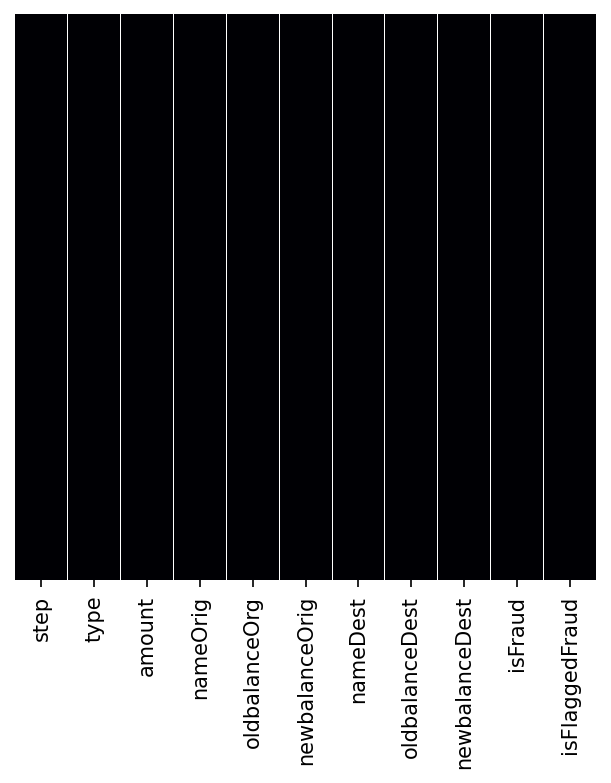

In [5]:
plt.figure(figsize=(5,5),dpi=150)
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='magma')

INFERENCE: THERE ARE NO NULL OR NA VALUES IN THE DATASET (MISSSING VALUES) 

CORRELATION 

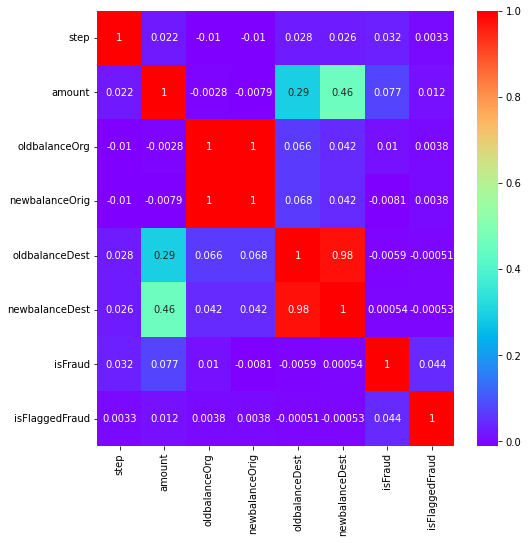

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')

INFERENCE: 

1.  OldbalanceOrig & newbalanaceOrig are strongly correlated
2.  OldbalanceDest & newBalanceDest are also correlated


with some other results from the heatmap



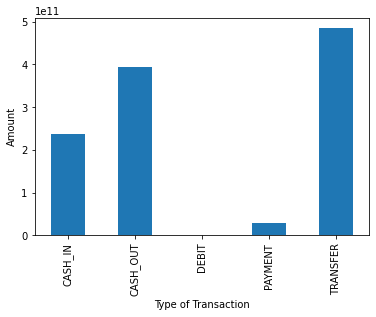

In [7]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [8]:
data.loc[data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

This Shows that Frauds happen in these two TYPES of Transactions : TRANSFER, CASH_OUT.


In [9]:
#Diving Cases into Fraud and Non Fraud
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

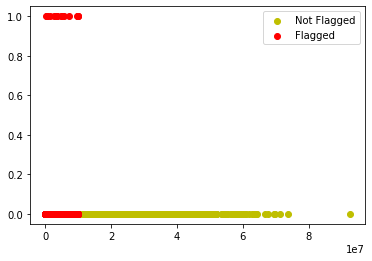

In [53]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.scatter(nonfraud['amount'],nonfraud['isFlaggedFraud'],c='y')
axes.scatter(fraud['amount'],fraud['isFlaggedFraud'],c='r')
plt.legend(loc='upper right',labels=['Not Flagged','Flagged'])
plt.show()


The Above Plot Shows Fraud Transactions Which have been Flagged or Not. This shows a need for a system That is fast in Flagging these kinds of transactions. The transactions taggind system needs to modified, tested and implemented to flag these transactions.

(array([3.50080e+04, 2.70525e+05, 2.59099e+05, 1.13930e+04, 1.23383e+05,
        2.84247e+05, 4.60180e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.47880e+04, 1.38650e+04, 0.00000e+00,
        0.00000e+00, 1.03220e+04, 5.49100e+04, 2.30228e+05, 1.54179e+05,
        1.69300e+03, 1.63779e+05, 2.30907e+05, 2.58990e+04, 1.07505e+05,
        2.57090e+05, 8.49590e+04, 1.80860e+04, 2.25582e+05, 1.71834e+05,
        3.33100e+03, 1.61983e+05, 2.03724e+05, 2.61010e+04, 9.02720e+04,
        2.53635e+05, 7.35400e+04, 7.92000e+03, 1.73841e+05, 1.61383e+05,
        5.94600e+03, 1.73270e+05, 2.28647e+05, 2.62870e+04, 7.47650e+04,
        2.04811e+05, 1.16563e+05, 1.51830e+04, 1.97545e+05, 1.84494e+05,
        5.41100e+03, 1.26625e+05, 2.23599e+05, 2.52350e+04, 7.10030e+04,
        2.25798e+05, 1.27080e+05, 2.44900e+03, 5.86400e+03, 1.19550e+04,
        2.32000e+02, 2.13900e+03, 7.77500e+03, 1.33000e+03, 1.08800e+03,
        1.14220e+04, 6.54900e+03, 1.20700e+03, 1.39

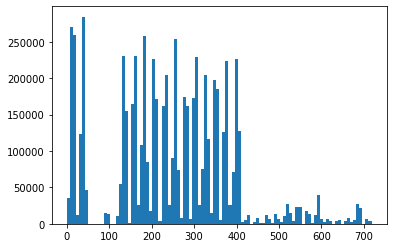

In [62]:
plt.hist(nonfraud['step'], bins=100)

(array([ 90.,  97.,  78.,  60., 121.,  89.,  77., 102.,  98., 116.,  64.,
         96.,  74.,  74.,  88.,  68.,  80.,  66.,  60.,  98.,  84., 106.,
         58.,  92.,  86.,  68.,  72.,  71., 104.,  70., 106.,  82.,  74.,
         94.,  62.,  92., 104.,  90.,  88.,  80.,  64.,  78.,  88.,  78.,
         58.,  80.,  62., 100.,  84.,  74.,  78.,  70., 104.,  96., 116.,
         98.,  64.,  82.,  66., 100.,  60.,  90.,  84.,  62.,  72.,  72.,
         88.,  82.,  70.,  82.,  82.,  78.,  72.,  52.,  86.,  94.,  94.,
         78.,  84.,  58.,  72.,  82.,  88.,  84.,  76.,  94.,  86.,  82.,
         82.,  62.,  90.,  60.,  92.,  92.,  88.,  68.,  84.,  90.,  88.,
         94.]),
 array([  1.  ,   8.42,  15.84,  23.26,  30.68,  38.1 ,  45.52,  52.94,
         60.36,  67.78,  75.2 ,  82.62,  90.04,  97.46, 104.88, 112.3 ,
        119.72, 127.14, 134.56, 141.98, 149.4 , 156.82, 164.24, 171.66,
        179.08, 186.5 , 193.92, 201.34, 208.76, 216.18, 223.6 , 231.02,
        238.44, 245.86, 253.28

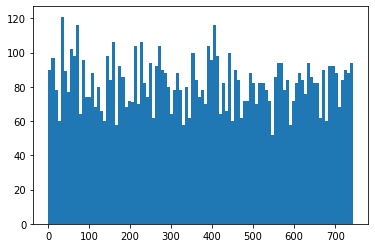

In [63]:
plt.hist(fraud['step'], bins=100)

The Above Histogram plot shows that : Non fraud transcations dont run for long steps and fraud transaactions runs for more time But Some fraud transactions can run for short amount of time. Large Steps Transactions need to Cancelled based on pther parameters to prevent Fraudulant Transactions

In [35]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [36]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [37]:
#1 Hot Encoding FOR TYPE DATA
one_data = pd.get_dummies(data, columns = ['type'])

one_data.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

Other Encoding Functions like Label Encoder can also be used to encode the categorical values in our case that is ['Type']

In [38]:
Z=one_data.drop(['isFraud'],axis=1)
w=one_data.isFraud

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Z, w, test_size = 0.2, random_state = 1) 
#train test split (the sklearn.model_selection import train_test_split is only capable of splitting into two not into three)

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) #Validataion Split

Decision Tree


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
def prediction(X_test, clf_object):
y_pred = clf_object.predict(X_test)
print("Predicted values:")
print(y_pred)
return y_pred

In [42]:
def train_using_entropy(X_train, X_test, y_train):
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)
return clf_entropy

In [43]:
def cal_accuracy(y_test, y_pred):
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
print("Report : ", classification_report(y_test, y_pred))
  

In [44]:
def main():
clf_entropy = train_using_entropy(X_train, X_test, y_train)
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)
if __name__=="__main__":
main()

Results Using Entropy:
Predicted values:
[0 0 0 ... 0 0 0]
Confusion Matrix:  [[1270430     447]
 [    509    1138]]
Accuracy :  99.92487371554486
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270877
           1       0.72      0.69      0.70      1647

    accuracy                           1.00   1272524
   macro avg       0.86      0.85      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524



Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9997076675960532


Similarly the isFlaggedFraud can be predicted in same manner. Here We are getting good results due to 1 Hot Encoding feature to encode the categorical data['Type']

> As we can see the results using Decision Tree and Random Forest 

